## (1) Data Description

### Overview

- The dataset was collected by a UBC Computer Science research group studying how people play on a Minecraft server.  
- Two datasets were provided:
  - `players.csv` — player-level information such as demographics, skill, and newsletter subscription.
  - `sessions.csv` — session-level information, where each row represents a single play session (with timestamps, duration, etc.).  
- The data were collected automatically through server logs and voluntary player sign-ups.  


In [6]:
library(tidyverse)

# Loading the datasets
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

# Observe the first 3 rows
head(players, 3)
head(sessions, 3)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12


The datasets were successfully loaded into R.
The preview above shows the first few rows from both files, confirming that each dataset has multiple variables related to player information and session activity.
Each row in players.csv represents one unique player, while each row in sessions.csv represents one play session recorded on the Minecraft server.

In [5]:
data_shapes <- tibble(
  dataset = c("players.csv", "sessions.csv"),
  rows    = c(nrow(players), nrow(sessions)),
  columns = c(ncol(players), ncol(sessions))
)

data_shapes

dataset,rows,columns
<chr>,<int>,<int>
players.csv,196,7
sessions.csv,1535,5


The table above summarizes the size of each dataset.  
- **Rows** = number of observations (records).  
- **Columns** = number of variables (features).  
`players.csv` contains player-level data, and `sessions.csv` contains session-level data.


In [ ]:
str(players)
str(sessions)

### Variable Summary (players.csv)

I used the `str()` function in R to inspect the structure of both datasets and personally summarized the variables below.  
This includes the variable names, data types, and short descriptions based on what was shown by `str()`.  


| Variable | Type | Description |
|-----------|------|-------------|
| experience | character | Player’s reported experience level (e.g., Pro, Veteran, Amateur). |
| subscribe | logical (TRUE/FALSE) | Whether the player subscribed to the newsletter. |
| hashedEmail | character | Hashed email ID used to match between files. |
| played_hours | numeric | Total hours the player has played. |
| name | character | Player name (not used for modeling). |
| gender | character | Gender identity of the player. |
| Age | numeric | Age of the player in years. |

---

### Variable Summary (sessions.csv)

| Variable | Type | Description |
|-----------|------|-------------|
| hashedEmail | character | Key linking each session to a player. |
| start_time | character | Start time of the game session. |
| end_time | character | End time of the game session. |
| original_start_time | numeric | Timestamp version of start_time. |
| original_end_time | numeric | Timestamp version of end_time. |

---

**Notes**
- `subscribe` is likely the best outcome (response) variable for prediction.  
- `played_hours` and `experience` might be useful explanatory variables.  
- Missing values appear minimal.  
- Player-level data (`players.csv`) and session-level data (`sessions.csv`) can be joined via `hashedEmail` if needed.


In [12]:
# Add avg_age and avg_played_hours as new columns in the dataset
players <- players |>
  mutate(
    avg_age = round(mean(Age, na.rm = TRUE), 2),
    avg_played_hours = round(mean(played_hours, na.rm = TRUE), 2)
  )

# Preview first few rows to confirm the new columns
head(players, 3)


experience,subscribe,hashedEmail,played_hours,name,gender,Age,mean_age,mean_played_hours
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,21.14,5.85
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,21.14,5.85
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,21.14,5.85


### Mean Values of Numeric Variables

The mean values of **Age** and **played_hours** were calculated using the `summarise()` and `mean()` functions.
All results were rounded to two decimal places.  
This provides a quick summary of the typical scale of each numeric variable before modeling.


### Potential Data Issues and Notes

- **Missing data:** Some demographic variables (such as `Age` or `gender`) have missing values.  
- **Outliers:** A few players have extremely high `played_hours` values compared to the average.  
- **Sampling bias:** Only players who voluntarily joined the server are included in the data, which may not represent all Minecraft players.  
- **Privacy considerations:** The variable `hashedEmail` is used instead of raw email addresses for anonymity.  
- **Data collection:** The data were collected through server logs and voluntary sign-ups. While reliable for in-game activity, it may not capture external factors like device type or play motivation.  
- **Overall suitability:** Despite these issues, the dataset appears suitable for exploratory and predictive analysis.


## (2) Questions

### Broad Question
What player characteristics and behaviours are most predictive of subscribing to the Minecraft game newsletter?

### Specific Question
Can we predict whether a player subscribes to the newsletter (subscribe) based on their experience level (experience), gender (gender), age (Age), and total played hours (played_hours)?

### Explanation
The response variable (outcome) is subscribe, a logical variable that shows whether a player subscribed to the newsletter.  
The explanatory variables (predictors) include:  
- experience: categorical (Pro, Veteran, Amateur)  
- gender: categorical (Male, Female, etc.)  
- Age: numeric  
- played_hours: numeric (hours of total gameplay)

These predictors were chosen because they describe both demographic and behavioural aspects of the players, which are likely related to engagement and interest in subscribing.  
The goal is to explore if these player traits can predict subscription behaviour.  
The analysis will use the player-level data (players.csv) because sessions.csv contains session-level details rather than subscription information.

### How the Data Will Help Answer This Question
The players.csv dataset contains both demographic and behavioural information for each player, which makes it suitable for studying the relationship between player traits and newsletter subscription.  
The variable subscribe clearly indicates whether each player chose to receive the newsletter, providing a binary outcome for a classification task.  
Predictors such as experience, Age, gender, and played_hours represent meaningful characteristics that could influence a player's likelihood to subscribe.  
By comparing differences in these predictors between subscribed and non-subscribed players, we can see which factors are most closely related to subscribing behaviour.  
Later, this question can be answered using a simple predictive model such as K-Nearest Neighbours or Logistic Regression, trained on the player-level data to estimate the probability of subscription for new players.

## (3) Exploratory Data Analysis and Visualization

This section explores the player-level data to understand the overall patterns and relationships between variables before any predictive modeling is done.  
All plots include clear labels and are used to visually examine how player characteristics relate to newsletter subscription.


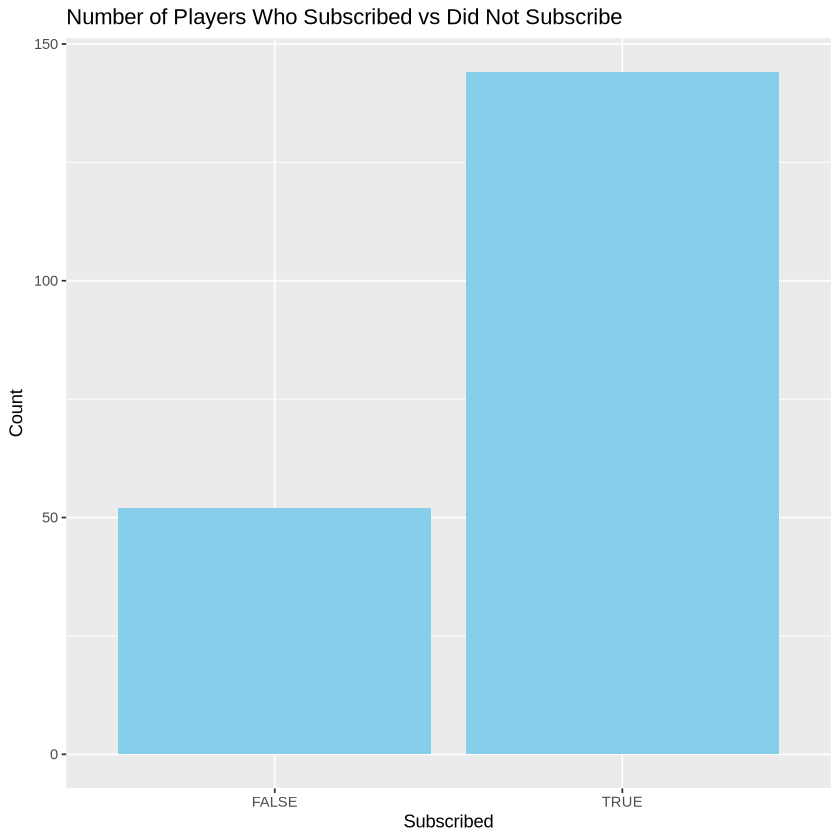

In [10]:
# Bar chart showing how many players subscribed vs not
players |> 
  ggplot(aes(x = subscribe)) +
  geom_bar(fill = "skyblue") +
  labs(
    title = "Number of Players Who Subscribed vs Did Not Subscribe",
    x = "Subscribed",
    y = "Count"
  )


The plot above shows the number of players who subscribed compared to those who did not.  
This helps check whether the data is balanced between the two classes.  
If there are many more non-subscribers than subscribers, the dataset may be slightly imbalanced.

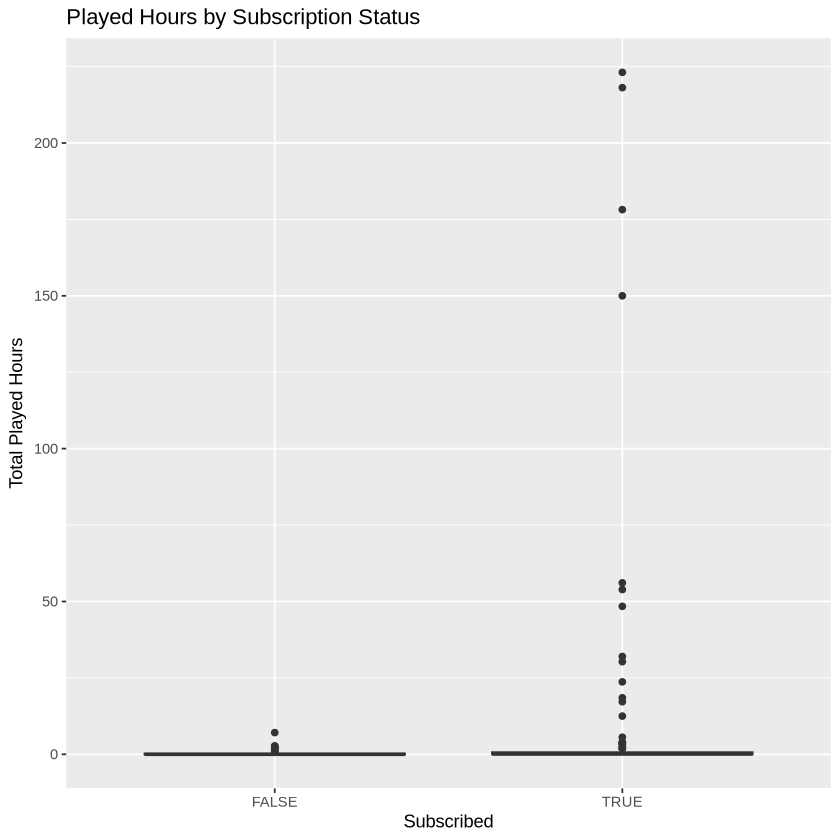

In [11]:
# Boxplot: played hours vs subscribe
players |> 
  ggplot(aes(x = subscribe, y = played_hours)) +
  geom_boxplot(fill = "lightgreen") +
  labs(
    title = "Played Hours by Subscription Status",
    x = "Subscribed",
    y = "Total Played Hours"
  )
